In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
given = pd.read_csv('/content/accident.csv')
given.head(20)

,Number_of_Casualties,Engine_Capacity_(CC)
0,1,-1
1,1,8268
2,1,8300
3,1,1762
4,1,1769
5,1,85
6,1,2976
7,2,124
8,2,-1
9,5,4266


In [43]:
given['Engine_Capacity_(CC)'].replace(-1,400)

0           400
1          8268
2          8300
3          1762
4          1769
           ... 
1048570    5861
1048571    2470
1048572     400
1048573    1868
1048574     998
Name: Engine_Capacity_(CC), Length: 1048575, dtype: int64

In [42]:
duplicates_casualties = given[given['Number_of_Casualties'].duplicated()]
duplicates_engine = given[given['Engine_Capacity_(CC)'].duplicated()]
print(duplicates_casualties)
print(duplicates_engine)

         Number_of_Casualties  Engine_Capacity_(CC)
1                           1                  8268
2                           1                  8300
3                           1                  1762
4                           1                  1769
5                           1                    85
...                       ...                   ...
1048570                     2                  5861
1048571                     1                  2470
1048572                     1                    -1
1048573                     1                  1868
1048574                     1                   998

[1048534 rows x 2 columns]
         Number_of_Casualties  Engine_Capacity_(CC)
8                           2                    -1
12                          1                    -1
13                          1                  8268
14                          2                    -1
17                          1                   124
...                       ...       

In [41]:
unique_values = given.value_counts()
print(unique_values)

Number_of_Casualties  Engine_Capacity_(CC)
1                     -1                      233866
2                     -1                       50909
1                      1598                    27095
                       1998                    21987
                       1796                    20150
                                               ...  
2                      10100                       1
                       10298                       1
                       10500                       1
                       10520                       1
68                    -1                           1
Length: 5992, dtype: int64


In [40]:
null = given.isnull().sum()
print(null)

Number_of_Casualties    0
Engine_Capacity_(CC)    0
dtype: int64


In [39]:
summary = given.describe()
print(given.info())
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   Number_of_Casualties  1048575 non-null  int64
 1   Engine_Capacity_(CC)  1048575 non-null  int64
dtypes: int64(2)
memory usage: 16.0 MB
None
       Number_of_Casualties  Engine_Capacity_(CC)
count          1.048575e+06          1.048575e+06
mean           1.359930e+00          1.358289e+03
std            8.223645e-01          1.714334e+03
min            1.000000e+00         -1.000000e+00
25%            1.000000e+00         -1.000000e+00
50%            1.000000e+00          1.360000e+03
75%            1.000000e+00          1.834000e+03
max            6.800000e+01          9.999900e+04


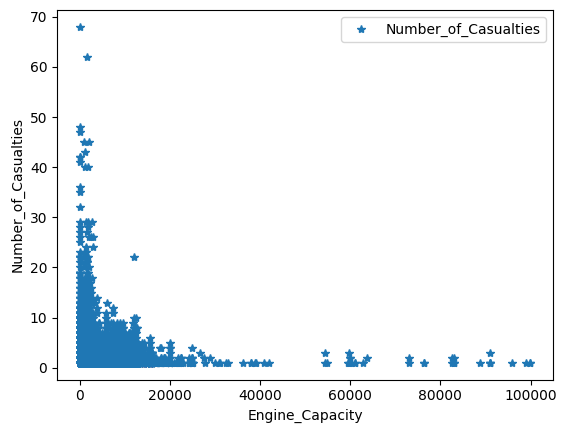

In [38]:
variables = given.loc[:,['Number_of_Casualties','Engine_Capacity_(CC)']]
given.plot(x='Engine_Capacity_(CC)',y='Number_of_Casualties',style='*')
plt.xlabel('Engine_Capacity')
plt.ylabel('Number_of_Casualties')
plt.show()

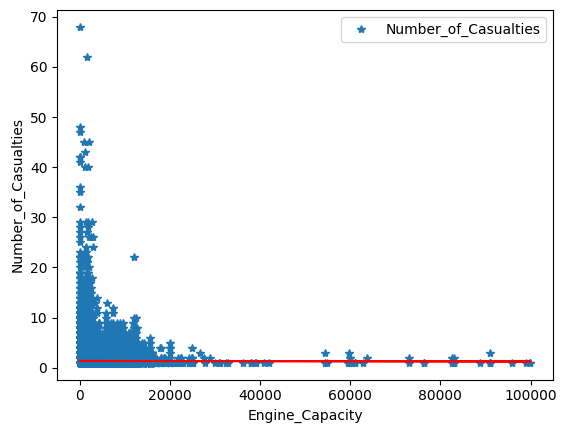

,Number_of_Casualties,Engine_Capacity_(CC)
0,1,-1
1,1,8268
2,1,8300
3,1,1762
4,1,1769


In [37]:
regressor = LinearRegression()
X = given[['Engine_Capacity_(CC)']]
y = given[['Number_of_Casualties']]
regressor.fit(X,y)
given.plot(x='Engine_Capacity_(CC)',y='Number_of_Casualties',style='*')
plt.plot(X, regressor.predict(X), color='red', label='Regression line')
plt.xlabel('Engine_Capacity')
plt.ylabel('Number_of_Casualties')
plt.show()
given.head(5)

In [36]:
x = pd.DataFrame(given['Engine_Capacity_(CC)'])
y = pd.DataFrame(given['Number_of_Casualties'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(x_test)
print(y_pred)
y_test


(838860, 1)
(209715, 1)
(838860, 1)
(209715, 1)
[1.36155044]
[[-1.03502219e-06]]
[[1.36054336]
 [1.36155147]
 [1.35957355]
 ...
 [1.36020905]
 [1.35867722]
 [1.36155147]]


,Number_of_Casualties
1045953,1
358409,1
875012,1
555046,1
272972,1
...,...
181305,1
672605,1
718823,1
1006146,2


In [35]:
#Evaluation
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)

MAE 0.5467008963827716
MSE 0.669012246023406
RMSE 0.8179316878709407


In [34]:
#Save the model
import joblib
import pickle
#train the model
model = LinearRegression()
model.fit(x,y)
joblib.dump(model, 'accident.pkl')
with open('accident.pkl', 'wb') as file:
  pickle.dump(model, file)

In [47]:
new_x = np.array([5,15,25,35,45]).reshape(-1,1)
model = joblib.load('accident.pkl')
predictions = model.predict(new_x)
new_data=pd.DataFrame({'x':new_x.flatten(), 'Predicted_y': predictions.flatten()})
print(new_data)

    x  Predicted_y
0   5     1.361206
1  15     1.361197
2  25     1.361187
3  35     1.361178
4  45     1.361168


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
